In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Gerando algumas visualizações descritivas com matplotlib

Vamos utilizar um dataset [dos preços dos combustíveis no Brasil](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil).

Reproduza as visualizações abaixo. Para cada uma, pense em pontos que você poderia modificar na visualização, pensando em aprimorá-la.

#### Preços médios do etanol e da gasolina, por região do Brasil

In [2]:
df_combustiveis = pd.read_csv('data/combustiveis-2004-2021.tsv', sep='\t')
df_combustiveis.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [3]:
df_combustiveis['DATA BASE'] = pd.to_datetime(df_combustiveis['DATA FINAL']).dt.date

In [4]:
df_etanol = pd.pivot_table(df_combustiveis.loc[df_combustiveis['PRODUTO']=='ETANOL HIDRATADO'], values='PREÇO MÉDIO REVENDA',
                                  index='DATA BASE',
                                  columns='REGIÃO',
                                  aggfunc='mean').fillna(0)

In [5]:
df_etanol

REGIÃO,CENTRO OESTE,NORDESTE,NORTE,SUDESTE,SUL
DATA BASE,,,,,
2004-05-15,1.27525,1.367333,1.593286,1.05475,1.125000
2004-05-22,1.26900,1.365889,1.586286,1.05000,1.123000
2004-05-29,1.27225,1.363111,1.593857,1.06500,1.145333
2004-06-05,1.31450,1.364778,1.607429,1.10900,1.219000
2004-06-12,1.33100,1.381444,1.626143,1.12175,1.241333
...,...,...,...,...,...
2021-04-03,4.17575,4.497333,4.726571,4.37400,4.634000
2021-04-10,4.02875,4.460000,4.698286,4.25750,4.548333
2021-04-17,3.95225,4.447889,4.647714,4.20875,4.528000


In [6]:
df_gasolina = pd.pivot_table(df_combustiveis.loc[df_combustiveis['PRODUTO']=='GASOLINA COMUM'], values='PREÇO MÉDIO REVENDA',
                                  index='DATA BASE',
                                  columns='REGIÃO',
                                  aggfunc='mean').fillna(0)
df_gasolina

REGIÃO,CENTRO OESTE,NORDESTE,NORTE,SUDESTE,SUL
DATA BASE,,,,,
2004-05-15,2.13300,2.045667,2.194143,1.98575,2.057000
2004-05-22,2.13000,2.043111,2.208000,1.98000,2.054667
2004-05-29,2.13150,2.037778,2.212286,1.98375,2.053667
2004-06-05,2.14650,2.037333,2.219429,1.99825,2.076667
2004-06-12,2.14775,2.050222,2.231429,2.00575,2.081667
...,...,...,...,...,...
2021-04-03,5.57150,5.478667,5.486429,5.65175,5.330333
2021-04-10,5.57925,5.467667,5.509714,5.64250,5.276667
2021-04-17,5.52150,5.423444,5.531571,5.63300,5.263667


C:\Users\carol\AppData\Local\Temp\ipykernel_21544\1842578915.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[k].set_xticklabels(labels=df.index, rotation = 45)


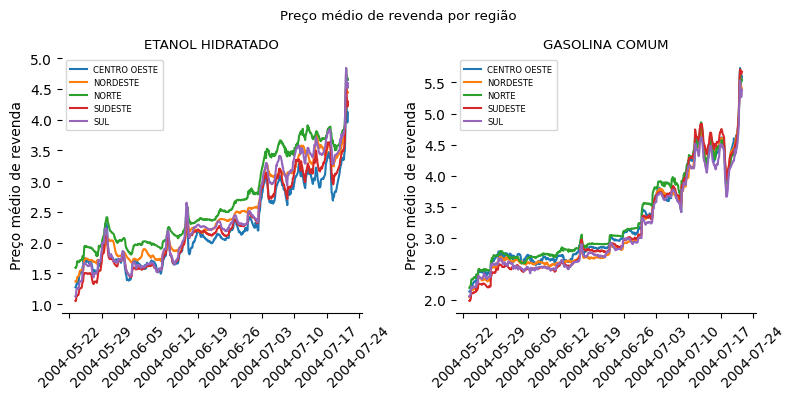

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

plt.rcParams.update({'font.size': 8})

plt.subplot(1,2,1)
plt.plot(df_etanol)
plt.title('ETANOL HIDRATADO')

plt.subplot(1,2,2)
plt.plot(df_gasolina)
plt.title('GASOLINA COMUM')

subplots = {0: df_etanol, 1: df_gasolina}

for k, df in subplots.items():
    ax[k].spines['right'].set_visible(False)
    ax[k].spines['top'].set_visible(False)
    ax[k].spines['left'].set_visible(False)

    ax[k].set_ylabel('Preço médio de revenda')
    ax[k].set_xticklabels(labels=df.index, rotation = 45)
    ax[k].legend(df.columns, borderpad=0.5, fontsize=6)


plt.suptitle('Preço médio de revenda por região')
plt.tight_layout()
plt.draw()

#### Preço médio em 2020 dos preços do Etanol e da Gasolina por região

In [8]:
def check_year(value):
        return value.year == 2020


C:\Users\carol\AppData\Local\Temp\ipykernel_21544\158942040.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_gasolina_2020 = df_gasolina_2020.loc[df_gasolina_2020['DATA BASE'].apply(check_year)].mean()
C:\Users\carol\AppData\Local\Temp\ipykernel_21544\158942040.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_etanol_2020 = df_etanol_2020.loc[df_etanol_2020['DATA BASE'].apply(check_year)].mean()


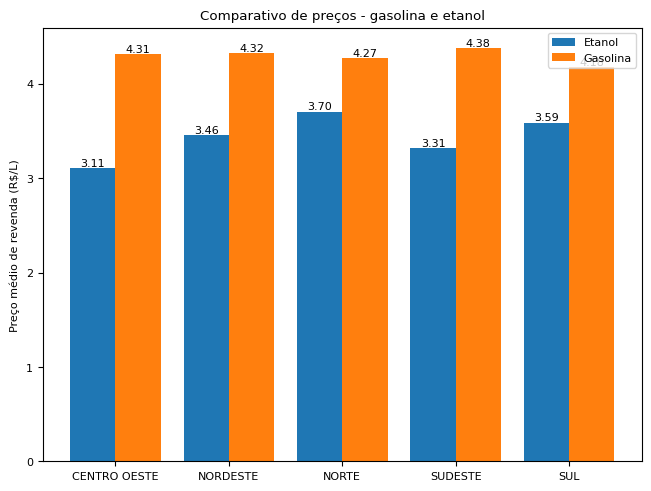

In [9]:
df_gasolina_2020 = df_gasolina.reset_index()
df_etanol_2020 = df_etanol.reset_index()


df_gasolina_2020 = df_gasolina_2020.loc[df_gasolina_2020['DATA BASE'].apply(check_year)].mean()
df_etanol_2020 = df_etanol_2020.loc[df_etanol_2020['DATA BASE'].apply(check_year)].mean()

fig, ax = plt.subplots(layout='constrained')
plt.title('Comparativo de preços - gasolina e etanol')

x_axis = np.arange(len(df_etanol_2020.index))

bars1 = plt.bar(x_axis-0.2, df_etanol_2020, label='Etanol', width=0.4)
ax.bar_label(bars1, fmt = '%.2f')

bars2 = plt.bar(x_axis+0.2, df_gasolina_2020, label='Gasolina', width=0.4)
ax.bar_label(bars2, fmt = '%.2f')

ax.set_ylabel('Preço médio de revenda (R$/L)')

plt.xticks(x_axis, df_gasolina_2020.index)
plt.legend()

plt.draw()


#### Total consolidado de postos para cada estado

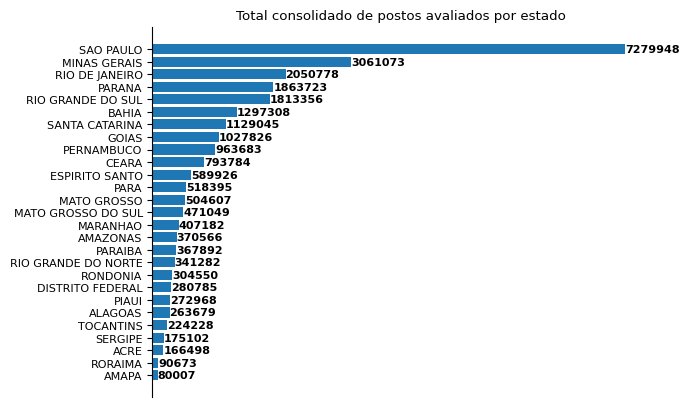

In [14]:
estados = df_combustiveis.groupby('ESTADO')['NÚMERO DE POSTOS PESQUISADOS'].sum().sort_values()
fig, ax = plt.subplots()

plt.title('Total consolidado de postos avaliados por estado')

bars = plt.barh(estados.index, estados)

ax.bar_label(bars, fmt = '%.0f', fontweight='bold')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.get_xaxis().set_visible(False)
plt.draw()

#### Relação entre preço da gasolina e do etanol (nível Brasil)

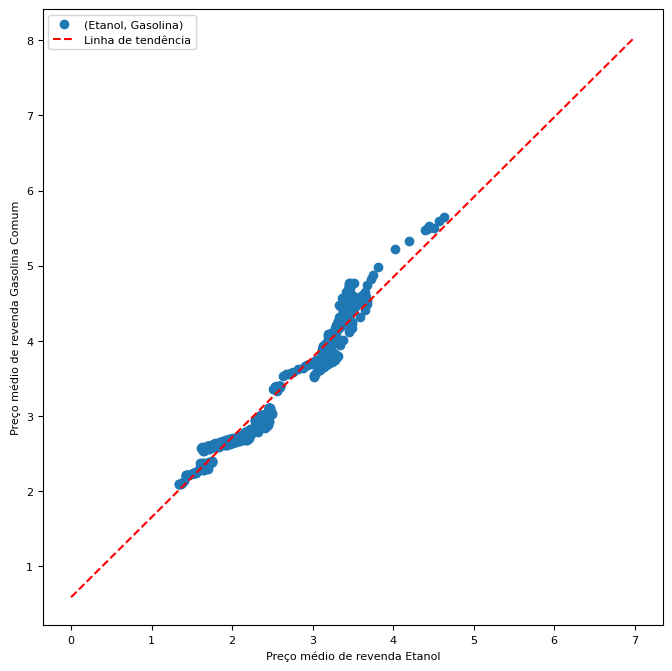

In [11]:
from scipy.stats import linregress

df_etanol = df_combustiveis[
    df_combustiveis['PRODUTO']=='ETANOL HIDRATADO'][
        ['DATA BASE', 'PREÇO MÉDIO REVENDA']].groupby('DATA BASE')['PREÇO MÉDIO REVENDA'].mean()
df_gasolina = df_combustiveis[
    df_combustiveis['PRODUTO']=='GASOLINA COMUM'][
        ['DATA BASE', 'PREÇO MÉDIO REVENDA']].groupby('DATA BASE')['PREÇO MÉDIO REVENDA'].mean()
    
plt.figure(figsize=(8,8))
plt.scatter(x=df_etanol, y=df_gasolina)

fit = linregress(x=df_etanol, y=df_gasolina)

x_lin = np.linspace(0,7,100)
y_lin = fit[0] * x_lin+fit[1]
plt.plot(x_lin, y_lin, '--r')

plt.legend(['(Etanol, Gasolina)', 'Linha de tendência'])
plt.xlabel('Preço médio de revenda Etanol')
plt.ylabel('Preço médio de revenda Gasolina Comum')

plt.draw()